# 决策树—ID3算法

定义：通过特征的有条件的分裂，最终形成分类结果。其中有条件的分裂是根据<span class="mark">熵(entropy)</span>和<span class="mark">最大信息增益(information gain)</span>来判断的。

熵定义为信息的期望值，那么对于信息$x_i$的定义为:$l(x_i)=-\log_2 p(x_i)$,而熵则是所有可能值包含的信息期望。

即$H=-\sum_{i=1}^n p(x_i)\log_2 p(x_i)$

信息增益：指每次节点split的时候，减小的熵值量，量越大说明获得的信息越多。

本次问题为判断<span class="mark">海洋生物是否为鱼类</span>：
特征为2个：<span class="mark">不浮出水面是否可以生存</span>；<span class="mark">是否有脚蹼</span>

In [1]:
import pandas as pd
df=pd.DataFrame({'不浮出水面是否可以生存':['是','是','是','否','否'],'是否有脚蹼':['是','是','否','是','是'],
                 '属于鱼类':['是','是','否','否','否']})
df

,不浮出水面是否可以生存,是否有脚蹼,属于鱼类
0,是,是,是
1,是,是,是
2,是,否,否
3,否,是,否
4,否,是,否


## 首先计算根节点的信息熵('属于鱼类'这列)

$p_1=\frac{2}{5},p_0=\frac{3}{5}$,所以$H=-\frac{2}{5}log_2 \frac{2}{5}-\frac{3}{5} log_2 \frac{2}{5}=0.9709505944546686$

## 计算不同特征划分后的熵值

***对于特征'不浮出水面是否可以生存':分裂后有两个子节点，所以有两个熵值，最后还需要通过样本量的占比进行加权求和。

对于左边的节点:$H_{left}=-\frac{2}{3}log_2 \frac{2}{3}-\frac{1}{3}log_2 \frac{1}{3}=0.9182958340544896$

对于右边的节点:$H_{right}=0$因为全部不属于鱼类，完全确定

所以通过分裂的样本来加权$H_{left}$和$H_{right}$:$H1=\frac{3}{5}H_{left}+\frac{2}{5}H_{right}=0.5509775004326937$

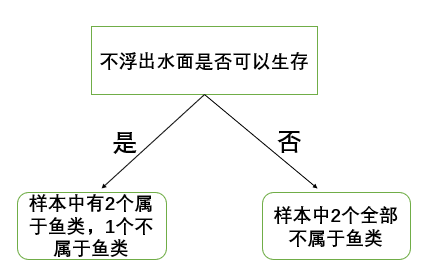

***对于特征'是否有脚蹼’:

左边的节点:$H_{left}=-\frac{2}{4}log_2 \frac{2}{4}-\frac{2}{4}log_2 \frac{2}{4}=1$

对于右边的节点:$H_{right}=0$因为全部不属于鱼类，完全确定

所以通过分裂的样本来加权$H_{left}$和$H_{right}$:$H1=\frac{4}{5}H_{left}+\frac{1}{5}H_{right}=0.8$

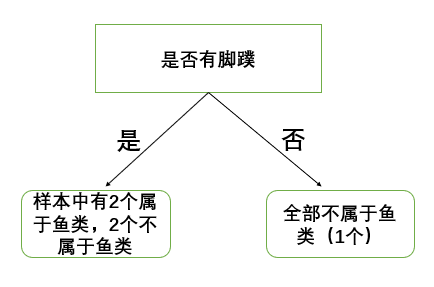

## 计算信息增益：

对于以'不浮出水面是否可以生存'分裂:$\Delta H1=0.9709505944546686-0.5509775004326937=0.4199730940219749$

对于以'是否有脚蹼'分裂:$\Delta H2=0.9709505944546686-0.8=0.17095059445466854$

所以选择以'不浮出水面是否可以生存'进行根节点的split

## 继续通过信息增益来split，直到分裂后的节点纯度为1
即完全属于鱼类，或完全不属于鱼类
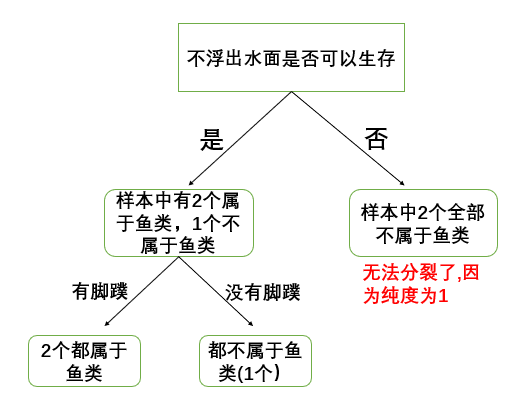

## 结论
<span class="mark">只要这个生物不能浮出水面生存，就不属于鱼类</span>.

<span class="mark">这个生物可以浮出水面生存且没有脚蹼，那么不属于鱼类；若有脚蹼则属于鱼类。</span>

# 代码编制

In [2]:
#调整下格式，对文本标签映射为数字,即'是'为1,'否'为0
for column in df.columns:
    df[column]=df[column].map({'是':1,'否':0})
df#注意，这个模块只能运行一次，不然结果为空

,不浮出水面是否可以生存,是否有脚蹼,属于鱼类
0,1,1,1
1,1,1,1
2,1,0,0
3,0,1,0
4,0,1,0


In [3]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(df.iloc[:,:2],df.iloc[:,2])
model.predict(df.iloc[:,:2])#这里我就不拆训练集和测试集了，样本太少了
score=model.score(df.iloc[:,:2],df.iloc[:,2])#预测的正确率
print(f'预测的正确率为{score*100}%')

预测的正确率为100.0%


In [11]:
from sklearn.tree import export_text
r=export_text(model,feature_names=list(df.columns[:-1]))
print(r)

|--- 不浮出水面是否可以生存 <= 0.50
|   |--- class: 0
|--- 不浮出水面是否可以生存 >  0.50
|   |--- 是否有脚蹼 <= 0.50
|   |   |--- class: 0
|   |--- 是否有脚蹼 >  0.50
|   |   |--- class: 1



[Text(133.92000000000002, 181.2, '不浮出水面是否可以生存 <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 鱼类'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 鱼类'),
 Text(200.88000000000002, 108.72, '是否有脚蹼 <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = 不属于鱼类'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 鱼类'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 不属于鱼类')]

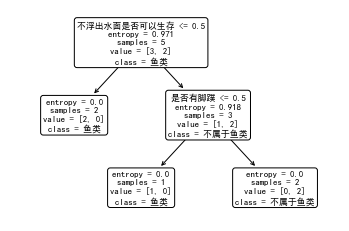

In [24]:
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']
plot_tree(model,feature_names=list(df.columns[:-1]),
          rounded=True,class_names=['鱼类','不属于鱼类'],)

In [9]:
list(df.columns[:-1])

['不浮出水面是否可以生存', '是否有脚蹼']

In [6]:
import pydotplus
import graphviz
from IPython.display import Image
from sklearn import tree
dot_data=tree.export_graphviz(
    model,
    out_file=None,
    feature_names=df.columns[:2].values,
    filled=True,
    impurity=True,
    rounded=True,
    class_names=['不是鱼类','是鱼类'],
    special_characters="utf-8"
 )

graph=graphviz.Source(dot_data.replace('helvetica', '"Microsoft YaHei"'), encoding='utf-8')
graph.view()



'Source.gv.pdf'

In [5]:
import math
df

,不浮出水面是否可以生存,是否有脚蹼,属于鱼类
0,1,1,1
1,1,1,1
2,1,0,0
3,0,1,0
4,0,1,0


In [80]:
#根节点根据那个划分
def original_node_entropy(x_labels):
    H0=0
    for i in pd.unique(x_labels):
        H0-=len(x_labels[x_labels==i])/len(x_labels)*math.log2(len(x_labels[x_labels==i])/len(x_labels))
    
    return H0#计算根节点的值
#original_node_entropy(df['属于鱼类'])
def feature_split_entropy(x_features,x_labels):
    #把求得的熵存储在列表中
    entropy_weight=[]
    for feature in x_features.columns:
        entropy=0#求出每个feature分裂下的单个熵
        for cat in pd.unique(x_features[feature]):
            indices=np.where(x_features[feature]==cat)#计算每一个种类的所在索引，以至于计算在x_labels这一列的熵值
            H1=0
            for i in pd.unique(x_labels.iloc[indices]):#单个cat下面的熵值
                H1-=(len(x_labels.iloc[indices][x_labels.iloc[indices]==i])/len(indices[0]))*math.log2((len(x_labels.iloc[indices][x_labels.iloc[indices]==i])/len(indices[0])))
                #np.where返回的是一个元组,太坑了,检查了好久
            entropy+=H1*len(x_features[feature][x_features[feature]==cat])/len(x_features[feature])
        
        entropy_weight.append(entropy)
    
    return entropy_weight

print(feature_split_entropy(df.iloc[:,:2],df.iloc[:,2]))

def information_gain(h0,h1,feature):
    value_max=0
    for ind,entropy_weight in enumerate(h1):
        if value_max< (h0-entropy_weight):
            value_max=(h0-entropy_weight)
            index=ind
    return feature.columns[index]
information_gain(original_node_entropy(df.iloc[:,2]),feature_split_entropy(df.iloc[:,:2],df.iloc[:,2]),df.iloc[:,:2])
    

print(list(df.groupby('不浮出水面是否可以生存'))[0][1])#分裂后的第一种
print(list(df.groupby('不浮出水面是否可以生存'))[1][1])#分裂后的第二种
#可以把所有的dataframe加入list，一个dataframe对应一个元素

#删除分裂用过的feature，对其他标签进行分裂，同时如果label列的标签nunique只有一个则，不再进行分裂

[0.5509775004326938, 0.8]
   不浮出水面是否可以生存  是否有脚蹼  属于鱼类
3            0      1     0
4            0      1     0
   不浮出水面是否可以生存  是否有脚蹼  属于鱼类
0            1      1     1
1            1      1     1
2            1      0     0
